In [5]:
import pandas as pd
import numpy as np
import pyreadr
from scipy.spatial import distance
from tqdm import tqdm

import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

In [6]:
df_full = pd.read_csv('/Users/annieulichney/Documents/GitHub/Deforestation/FinalData/FinalData2004.csv')

In [7]:
for year in [ 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    filename = f'/Users/annieulichney/Documents/GitHub/Deforestation/FinalData/FinalData{str(year)}.csv'
    df_full = pd.concat([df_full, pd.read_csv(filename)])

In [8]:
def drop_conditional(cols_list, df):
    for col in cols_list:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

In [9]:
#df_full = drop_conditional(['Unnamed: 0', 'ID', ], df_full)

In [10]:
df_full.shape

(2133501, 216)

In [11]:
df_full.ID

0         1100015.0
1         1100015.0
2         1100015.0
3         1100015.0
4         1100015.0
            ...    
160553    5108956.0
160554    5108956.0
160555    5108956.0
160556    5108956.0
160557    5108956.0
Name: ID, Length: 2133501, dtype: float64

In [12]:
#should year be in it? 

In [13]:
X_cols  = ['year', 'rain1', 'elevation', 'slope', 'aspect', 'near_mines',
       'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB',
       'n_companies_PUBLIC ADMIN', 'n_companies_AGRICULTURE',
       'n_companies_FOOD AND DRINKS', 'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 'murder_threats',
       'assassination', 'assassination_attempt', 'f_emitted_count',
       'expen_agri', 'expen_env_man', 'expen_agr_org', 'expen_mining',
       'expen_petrol', 'expen_prom_ani_pro', 'expen_prom_veg_pro',
       'expen_other_agr', 'expen_agr_defense', 'expen_min_fuel',
       'illegal_mining', 'illegal_other', 'illegal_industry', 'audits',
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full',
       'incumbant', 'term_limited_seat', 'special',
       'overall_winner_complete_college', 
       'overall_winner_feminino', 'overall_winner_agriculture_job',
       'overall_winner_public_service_job', 'overall_winner_health_job',
       'overall_winner_corporate_job', 'overall_winner_law_job',
       'overall_winner_technical_job', 'overall_winner_professional_job',
       'overall_winner_mining_job', 'overall_winner_partido_PT',
       'overall_winner_partido_PMDB_MDB', 'overall_winner_partido_PSDB',
       'overall_winner_partido_DEM', 'overall_winner_partido_PL',
       'overall_winner_partido_other', 'runnerup_partido_PT',
       'runnerup_partido_PMDB_MDB', 'runnerup_partido_PSDB',
       'runnerup_partido_DEM', 'runnerup_partido_PL',
       'runnerup_partido_other', 'winner_votes_proportion',
       'vote_participation_proportion',
       'forest_formation', 'savanna', 'mangrove', 'silvicultura',
       'pasture', 'sugarcane', 'mosaic_ag', 'urban', 'mining', 'water',
       'soybean', 'rice', 'other_crop', 'coffee', 'citrus',
       'other_perennial', 'forest_lag']


#'runnerup_votes_proportion', 
#'overall_winner_idade',

## Test Train Split

In [14]:
from sklearn.model_selection import GroupKFold, cross_val_predict

import geopandas as gpd

/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [15]:
df_full.shape[0]

2133501

In [16]:
df_full = df_full.sample(100).reset_index(drop=True)
Y = df_full['forest_diff']
X = df_full[X_cols]
# gdf = gpd.GeoDataFrame(X, geometry = gpd.points_from_xy(df_full.x, df_full.y))
# XYs = gdf['geometry']

In [17]:
#Select Test/Train Indices
n_folds = 10 
munis = df_full['ID'].values
group_kfold = GroupKFold(n_splits = n_folds)
muni_kfold = group_kfold.split(X, Y, munis) 
train_indices, test_indices = [list(traintest) for traintest in zip(*muni_kfold)]
city_cv = [*zip(train_indices,test_indices)]

test_inds = []
for i in range(3):
    test_inds.extend(city_cv[i][1])

train_inds = []
for i in range(3, 10):
    train_inds.extend(city_cv[i][1])


print(len(test_inds)/(len(train_inds) + len(test_inds)) )

0.3


In [18]:
#partition data into test/train sets

df_full_test = df_full.iloc[test_inds].reset_index(drop=True)
df_full_train = df_full.iloc[train_inds].reset_index(drop=True)

Y_test = df_full_test['forest_diff']
Y_train = df_full_train['forest_diff']

X_test = df_full_test[X_cols]
X_train = df_full_train[X_cols]

gdf_test = gpd.GeoDataFrame(X_test, geometry = gpd.points_from_xy(df_full_test.x, df_full_test.y))
gdf_train = gpd.GeoDataFrame(X_train, geometry = gpd.points_from_xy(df_full_train.x, df_full_train.y))

XYs_test = gdf_test['geometry']
XYs_train = gdf_train['geometry']


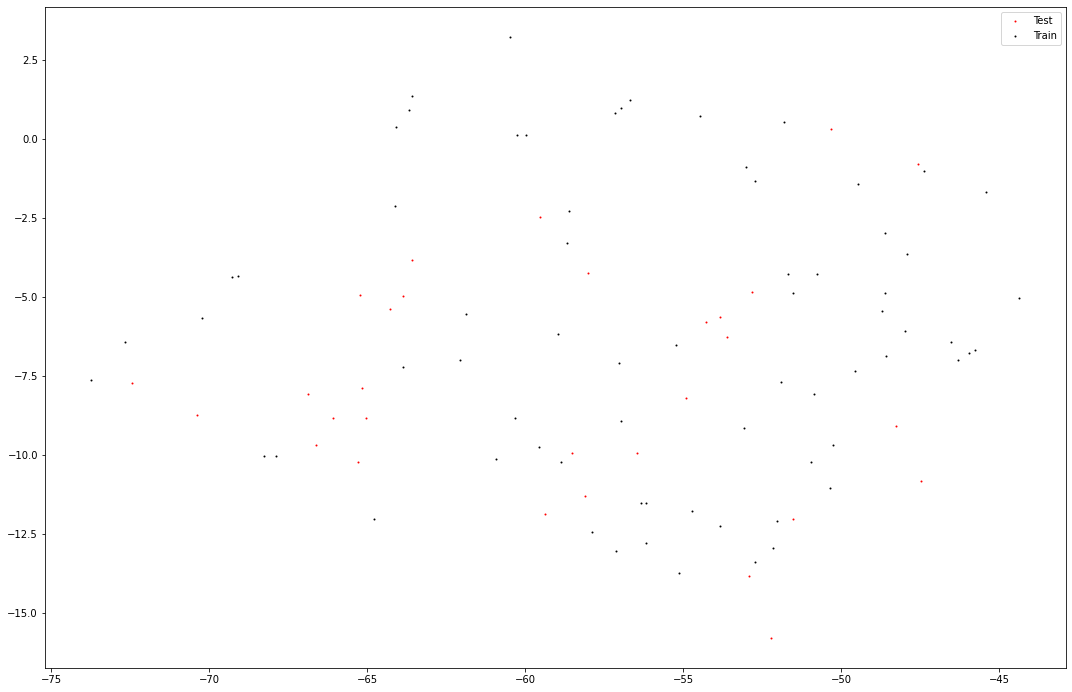

In [19]:
PLOT = True

if PLOT:
    fig, axs = plt.subplots(1, 1, figsize=(15, 12))
    marker_size = 0.1
    marker_size = 1
    XYs_test.plot(ax=axs, color = 'red', markersize=marker_size, label = 'Test')
    XYs_train.plot(ax=axs, color = 'black', markersize=marker_size, label = 'Train')

    plt.legend(markerscale=1)
    plt.tight_layout()
    plt.show()



In [20]:
#Select Cross Validation Fold Indices: 

n_folds = 5
munis = df_full_train['ID'].values
group_kfold = GroupKFold(n_splits = n_folds)

# Generator for the train/test indices
muni_kfold = group_kfold.split(X_train, Y_train, munis) 

# Create a nested list of train and test indices for each fold
train_indices, test_indices = [list(traintest) for traintest in zip(*muni_kfold)]
muni_cv = [*zip(train_indices,test_indices)]


In [21]:
PLOT_FOLDS = False
if PLOT_FOLDS: 
    fig, axs = plt.subplots(1, n_folds, figsize=(25, 16))
    marker_size = 0.01

    for i in range(n_folds):
        ax = axs[i]

        this_train_inds = muni_cv[i][0]
        this_test_inds = muni_cv[i][1]
        XYs_train[this_test_inds].plot(ax=ax, color = 'red', markersize=marker_size, label = 'Test')
        XYs_train[this_train_inds].plot(ax=ax, color = 'black', markersize=marker_size, label = 'Train')
        ax.set_title(f"Fold {i+1}")

    #plt.suptitle(f'{n_folds}-Fold Spatial Cross Validation ') 
    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels)   

    for ax in axs.flat:
        ax.set_axis_off()


    plt.legend(markerscale=100)
    plt.tight_layout()
    plt.show()



In [22]:
X_train.head()

,year,rain1,elevation,slope,aspect,near_mines,near_roads,near_hidrovia,indigenous_homol,mun_election_year,...,mining,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,geometry
0,2015,32.29549,72.0,0.0,27.0,290359.00,28879.570,80244.78,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.144522,POINT (-64.07500 0.37500)
1,2011,28.51548,237.0,0.0,138.0,68384.03,18701.530,37925.57,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,2.504874,POINT (-48.62500 -4.87500)
2,2013,38.90020,91.0,0.0,208.0,318943.10,3844.897,138295.90,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.143834,POINT (-63.67500 0.92500)
3,2012,34.38791,265.0,0.0,205.0,25996.01,32304.630,56336.05,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.100055,POINT (-55.22500 -6.52500)
4,2007,29.09628,67.0,0.0,315.0,99084.80,25645.110,44411.35,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0.0,3.115939,POINT (-61.87500 -5.52500)


In [23]:
# Count null values in each column
null_counts = {col: X_train[col].isnull().sum() for col in X_train.columns}

# Sort the dictionary in descending order based on the values
sorted_null_counts = dict(sorted(null_counts.items(), key=lambda item: item[1], reverse=True))

print(sorted_null_counts)

{'year': 0, 'rain1': 0, 'elevation': 0, 'slope': 0, 'aspect': 0, 'near_mines': 0, 'near_roads': 0, 'near_hidrovia': 0, 'indigenous_homol': 0, 'mun_election_year': 0, 'new_forest_code': 0, 'lula': 0, 'dilma': 0, 'temer': 0, 'bolsonaro': 0, 'fed_election_year': 0, 'populacao': 0, 'pib_pc': 0, 'ironore': 0, 'silver': 0, 'copper': 0, 'gold': 0, 'soy_price': 0, 'beef_price': 0, 'ag_jobs': 0, 'mining_jobs': 0, 'public_jobs': 0, 'construction_jobs': 0, 'PIB': 0, 'n_companies_PUBLIC ADMIN': 0, 'n_companies_AGRICULTURE': 0, 'n_companies_FOOD AND DRINKS': 0, 'n_companies_ACCOMODATION AND FOOD': 0, 'n_companies_EQUIPMENT RENTAL': 0, 'n_companies_WHOLESALE': 0, 'n_companies_ASSOCIATIVE ACTIVITIES': 0, 'n_companies_AUTOMOBILES AND TRANSPORT': 0, 'n_companies_FINANCIAL ASSISTANCE': 0, 'n_companies_TRADE REP VEHICLES': 0, 'n_companies_CONSTRUCTION': 0, 'n_companies_MAIL AND TELECOM': 0, 'n_companies_CULTURE AND SPORT': 0, 'n_companies_EDITING AND PRINTING': 0, 'n_companies_EDUCATION': 0, 'n_companies

In [24]:
X_train = X_train.drop('geometry', axis = 1)

In [25]:
X_test = X_test.drop('geometry', axis = 1)

In [26]:
def generate_results_table(coef_input, key_input, name_input):
    features_df = pd.DataFrame([key_input, coef_input]).T
    features_df.columns = ['Feature', 'Coeff']

    features_df = features_df.iloc[features_df['Coeff'].abs().argsort()[::-1]]
    features_df.to_csv(f'FeatureImportanceResults/{name_input}.csv')


    # Open the existing spreadsheet file
    #file_path = 'ResultsMuniCv.xlsx'
    #book = pd.read_excel(file_path, sheet_name=None)

    # Add the new sheet to the spreadsheet
    #sheet_name = name_input
    #book[sheet_name] = features_df

    # Save the updated spreadsheet
    #with pd.ExcelWriter(file_path) as writer:
    #    for sheet, df in book.items():
    #        features_df.to_excel(writer, sheet_name=sheet, index=False)


    # # Open the existing Excel file
    # writer = pd.ExcelWriter('ResultsMuniCV.xlsx', engine='openpyxl')

    # # Write the DataFrame to a specific sheet
    # features_df.to_excel(writer, sheet_name=name_input)

    # # Save the changes
    # writer.save()

    return features_df




In [27]:
#base_learners = [('ls', ls), ('el', el), ]

In [28]:
base_learners = []

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


#from sklearn.inspection import permutation_importance

In [30]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',RandomForestRegressor(n_estimators = 500))
])

In [31]:
search = GridSearchCV(pipeline,
                      {'model__max_depth': np.arange(3,11,8) },
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [32]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...............model__max_depth=3;, score=-0.000 total time=   0.8s
[CV 2/5] END ...............model__max_depth=3;, score=-0.000 total time=   0.8s
[CV 3/5] END ...............model__max_depth=3;, score=-0.001 total time=   0.8s
[CV 4/5] END ...............model__max_depth=3;, score=-0.005 total time=   0.8s
[CV 5/5] END ...............model__max_depth=3;, score=-0.001 total time=   0.8s


GridSearchCV(cv=[(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 68, 69]),
                  array([ 0,  1, 11, 12, 13, 15, 32, 33, 34, 48, 50, 52, 56, 67])),
                 (array([ 0,  1,  3,  5,  7,  8, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 24,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44,
       46, 47, 48,...
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 38, 39, 40, 41, 42, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59,
       60, 62, 64, 67, 68]),
                  array([ 5, 16, 37, 43, 44, 46, 55, 57, 58, 61, 63, 65, 66, 69]))],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(n_estimators=500))]),
             param_grid={'model__max_depth': array([3])},
             scoring='neg_mean_squared_error', verbose=3)

In [33]:
#model = RandomForestRegressor(n_estimators = 500, max_depth = search.best_params_['model__max_depth'])
#model.fit(X_train, Y_train)

In [34]:
base_learners.append(('randomforest', search.best_estimator_))

In [35]:
coefficients = search.best_estimator_._final_estimator.feature_importances_
importance = np.abs(coefficients)

randomforest_features_df = generate_results_table(coefficients, X_train.columns, 'randomforest')

X_train.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

Index(['n_companies_NON-METALLIC MINERAL PRODUCTS', 'winner_votes_proportion',
       'n_companies_RETAIL', 'pasture', 'n_jobs_DOMESTIC SERVICES',
       'vote_participation_proportion', 'n_jobs_RETAIL', 'rain1',
       'expen_other_agr'],
      dtype='object')

## Lasso

In [36]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [37]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [38]:
search = GridSearchCV(pipeline,
                      {'model__alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]},
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [39]:
search.fit(X_train,Y_train)
base_learners.append(('lasso', search.best_estimator_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...............model__alpha=1e-15;, score=-0.003 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-15;, score=-0.006 total time=   0.0s
[CV 3/5] END ...............model__alpha=1e-15;, score=-0.004 total time=   0.0s
[CV 4/5] END ...............model__alpha=1e-15;, score=-0.033 total time=   0.0s
[CV 5/5] END ...............model__alpha=1e-15;, score=-0.003 total time=   0.0s
[CV 1/5] END ...............model__alpha=1e-10;, score=-0.003 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-10;, score=-0.006 total time=   0.0s
[CV 3/5] END ...............model__alpha=1e-10;, score=-0.004 total time=   0.0s
[CV 4/5] END ...............model__alpha=1e-10;, score=-0.033 total time=   0.0s
[CV 5/5] END ...............model__alpha=1e-10;, score=-0.003 total time=   0.0s
[CV 1/5] END ...............model__alpha=1e-08;, score=-0.003 total time=   0.0s
[CV 2/5] END ...............model__alpha=1e-08;,

In [40]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

lasso_features_df = generate_results_table(coefficients, X_train.columns, 'lasso')

X_train.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

Index(['forest_lag', 'n_companies_FORESTRY',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RECYCLING',
       'n_companies_REAL ESTATE', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_CHEMICALS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_OIL AND GAS'],
      dtype='object')

## Gradient Boosting

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',GradientBoostingRegressor(learning_rate = 0.1, min_samples_leaf = 2))
])

In [43]:
search = GridSearchCV(pipeline,
                      {'model__n_estimators':np.arange(50, 150, 50), 'model__max_depth':np.arange(3, 5, 1)},
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [44]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END model__max_depth=3, model__n_estimators=50;, score=-0.000 total time=   0.1s
[CV 2/5] END model__max_depth=3, model__n_estimators=50;, score=-0.000 total time=   0.1s
[CV 3/5] END model__max_depth=3, model__n_estimators=50;, score=-0.001 total time=   0.1s
[CV 4/5] END model__max_depth=3, model__n_estimators=50;, score=-0.004 total time=   0.1s
[CV 5/5] END model__max_depth=3, model__n_estimators=50;, score=-0.001 total time=   0.1s
[CV 1/5] END model__max_depth=3, model__n_estimators=100;, score=-0.000 total time=   0.1s
[CV 2/5] END model__max_depth=3, model__n_estimators=100;, score=-0.000 total time=   0.1s
[CV 3/5] END model__max_depth=3, model__n_estimators=100;, score=-0.001 total time=   0.1s
[CV 4/5] END model__max_depth=3, model__n_estimators=100;, score=-0.004 total time=   0.1s
[CV 5/5] END model__max_depth=3, model__n_estimators=100;, score=-0.001 total time=   0.1s
[CV 1/5] END model__max_depth=4, mo

GridSearchCV(cv=[(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 68, 69]),
                  array([ 0,  1, 11, 12, 13, 15, 32, 33, 34, 48, 50, 52, 56, 67])),
                 (array([ 0,  1,  3,  5,  7,  8, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 24,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44,
       46, 47, 48,...
       36, 38, 39, 40, 41, 42, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59,
       60, 62, 64, 67, 68]),
                  array([ 5, 16, 37, 43, 44, 46, 55, 57, 58, 61, 63, 65, 66, 69]))],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(min_samples_leaf=2))]),
             param_grid={'model__max_depth': array([3, 4]),
                         'model__n_estimators': array([ 50, 100])},
             scoring='neg_mean_squared_error', verbose=3)

In [45]:
search.best_params_

{'model__max_depth': 3, 'model__n_estimators': 100}

In [46]:
base_learners.append(('gradientboosting', search.best_estimator_.named_steps['model']))

In [47]:
coefficients = search.best_estimator_.named_steps['model'].feature_importances_
importance = np.abs(coefficients)

gradient_boosting_features_df = generate_results_table(coefficients, X_train.columns, 'gradientboosting')



X.columns[np.argsort(np.array(abs( importance )))[::-1][0:9]]

Index(['n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_RETAIL',
       'winner_votes_proportion', 'pasture', 'n_companies_COMPUTING',
       'n_companies_FORESTRY', 'n_companies_PERSONAL SERVICES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'near_hidrovia'],
      dtype='object')

## Neural Network

In [48]:
from sklearn.neural_network import MLPRegressor
import shap

In [49]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model', MLPRegressor(activation = 'logistic', random_state=42))
])

In [50]:
search = GridSearchCV(pipeline,
                      {'model__hidden_layer_sizes':[(50,),(100,)], 'model__alpha':np.arange(0.00001, 0.001, 0.001)},
                      cv = muni_cv, scoring = "neg_mean_squared_error",verbose = 3
                      )

In [51]:
search.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.034 total time=   0.0s
[CV 2/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.028 total time=   0.0s
[CV 3/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.050 total time=   0.0s
[CV 4/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.141 total time=   0.0s
[CV 5/5] END model__alpha=1e-05, model__hidden_layer_sizes=(50,);, score=-0.045 total time=   0.0s
[CV 1/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.012 total time=   0.0s
[CV 2/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.040 total time=   0.0s
[CV 3/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.009 total time=   0.0s
[CV 4/5] END model__alpha=1e-05, model__hidden_layer_sizes=(100,);, score=-0.047 total time=   0.0s
[CV 5/5] END model__alpha=1e-05, model__hidde

GridSearchCV(cv=[(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 49, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 68, 69]),
                  array([ 0,  1, 11, 12, 13, 15, 32, 33, 34, 48, 50, 52, 56, 67])),
                 (array([ 0,  1,  3,  5,  7,  8, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 24,
       26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44,
       46, 47, 48,...
       36, 38, 39, 40, 41, 42, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59,
       60, 62, 64, 67, 68]),
                  array([ 5, 16, 37, 43, 44, 46, 55, 57, 58, 61, 63, 65, 66, 69]))],
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        MLPRegressor(activation='logistic',
                                                     random_state=42))]),
             param_grid={'model__alpha': array([1.e-05]),
                         'model__hidden_layer_sizes': [(50,), (100,)]},
             scoring='neg_mean_squared_error', verbose=3)

In [52]:

base_learners.append(('neuralnetwork', search.best_estimator_))

In [53]:
explainer = shap.KernelExplainer(search.best_estimator_.predict, X_train)

X does not have valid feature names, but StandardScaler was fitted with feature names


In [54]:
shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/30 [00:00<?, ?it/s]X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature names, but StandardScaler was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  3%|▎         | 1/30 [00:00<00:17,  1.67it/s]X does not have valid feature names, but StandardScaler was fitted with feature names
X does not have valid feature n

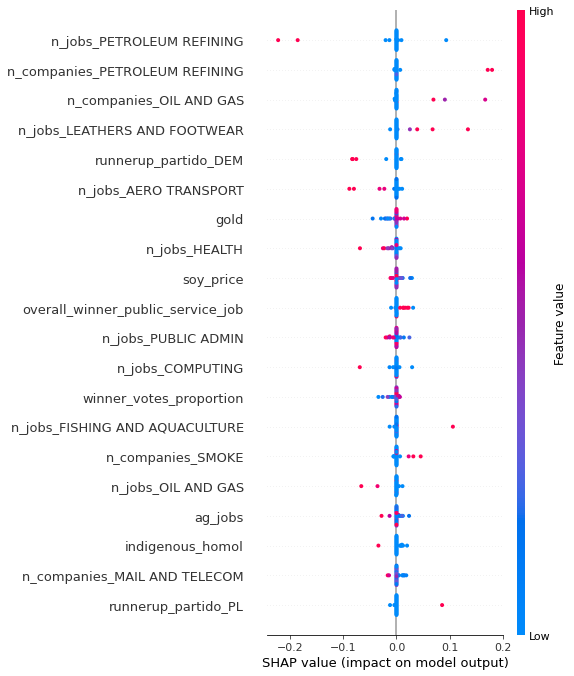

In [55]:
shap.summary_plot(shap_values,X_test,feature_names=X_test.columns)

In [56]:
feature_names = X_train.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

#shap_importance.to_csv('FeatureInportanceResults/neuralnetwork.csv')

In [57]:
features_df = generate_results_table(np.array(shap_importance.feature_importance_vals), np.array(shap_importance.col_name), 'neuralnetwork')

## Super Learner Ensemble

In [68]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [110]:
def get_models():
    base_models = []
    #Random forest regressor
    base_models.append(base_learners[0][1][1])
    #Lasso
    base_models.append(base_learners[1][1][1])
    #Gradient Boosting
    base_models.append(base_learners[2][1])
    #NeuralNetwork
    base_models.append(base_learners[3][1][1])
    return base_models

def get_out_of_fold_predictions(X_train, Y_train, base_models):
    meta_X = []
    meta_Y = []

    # enumerate splits
    for train_ix, test_ix in muni_cv:
        fold_yhats = []
        meta_train_X, meta_test_X = X_train.iloc[train_ix], X_train.iloc[test_ix]
        meta_train_Y, meta_test_Y = Y_train.iloc[train_ix], Y_train.iloc[test_ix]
        meta_Y.extend(meta_test_Y)

        # fit and make predictions with each sub-model
        for model in base_models:
            model.fit(meta_train_X, meta_train_Y)
            yhat = model.predict(meta_test_X)
            # store columns
            fold_yhats.append(yhat.reshape(len(yhat),1))
       
        meta_X.append(np.hstack(fold_yhats))
            
    return np.vstack(meta_X), np.asarray(meta_Y)

def super_learner_predictions(X, models, meta_model):
	meta_X = []
	for model in models:
		yhat = model.predict(X) 
		meta_X.append(yhat)
	# predict
	return meta_model.predict(pd.DataFrame(meta_X).T)
    
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 

def fit_meta_model(X, y):
	model = Ridge()
	model.fit(X, y)
	return model

def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, mse))

In [112]:
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, Y_train, models)
print('Meta Data Shape: ', meta_X.shape, meta_y.shape)

fit_base_models(X_train, Y_train, models)
meta_model = fit_meta_model(meta_X, meta_y)

evaluate_models(X_test, Y_test, models)

yhat = super_learner_predictions(X_test, models, meta_model)

# Evaluate the performance of the model
mse = mean_squared_error(Y_test, yhat)
print("MSE:", mse)

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.009e-02, tolerance: 6.706e-06


Meta  (70, 4) (70,)
RandomForestRegressor: 0.002
Lasso: 0.002
GradientBoostingRegressor: 0.002
MLPRegressor: 0.005
MSE: 0.0020957531286472457


In [157]:
#Super Learner Feature Importance

#Random forest 
random_forest_weighted_importance = models[0].feature_importances_ * meta_model.coef_[0]

#Lasso 
lasso_weighted_importance = models[1].coef_ * meta_model.coef_[1]

#GradientBoostingRegressor
gradient_boosting_weighted_importance = models[2].feature_importances_ * meta_model.coef_[2]

#NeuralNetwork
explainer = shap.KernelExplainer(models[2].predict, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)

feature_names = X_train.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])


nn_weighted_importance = shap_importance.feature_importance_vals * meta_model.coef_[3]





super_learner_feature_importance = np.mean([random_forest_weighted_importance, lasso_weighted_importance, gradient_boosting_weighted_importance, nn_weighted_importance], axis = 0)


X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  0%|          | 0/30 [00:00<?, ?it/s]X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
Regressors in active set degenerate. Droppin

In [147]:
shap_importance.feature_importance_vals

,col_name,feature_importance_vals
58,n_companies_RETAIL,0.002540
63,n_companies_FORESTRY,0.001623
5,near_mines,0.001546
7,near_hidrovia,0.001180
36,n_companies_AUTOMOBILES AND TRANSPORT,0.000889
...,...,...
166,overall_winner_public_service_job,0.000000
20,copper,0.000000
169,overall_winner_law_job,0.000000
170,overall_winner_technical_job,0.000000


In [146]:
explainer = shap.KernelExplainer(models[2].predict, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)

feature_names = X_train.columns

rf_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  0%|          | 0/30 [00:00<?, ?it/s]X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  3%|▎         | 1/30 [00:00<00:16,  1.76it/

In [145]:
(shap_values)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.05675901e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.27030615e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.62342827e-03, 1.15576693e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.23303850e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [133]:
models[2].feature_importances_ * meta_model.coef_[2]

array([0.00000000e+00, 8.27232956e-03, 0.00000000e+00, 2.45284578e-06,
       1.00258157e-02, 2.70454800e-02, 1.87085659e-02, 2.36352376e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.16839315e-06, 5.71077321e-06, 0.00000000e+00, 6.53311822e-05,
       4.54313060e-04, 0.00000000e+00, 4.59988680e-05, 7.60774651e-03,
       2.10151117e-03, 3.67111152e-04, 0.00000000e+00, 0.00000000e+00,
       1.59830459e-03, 7.51131916e-04, 5.27079327e-05, 9.46272764e-06,
       1.08405126e-02, 3.82764842e-04, 5.35716997e-05, 0.00000000e+00,
       2.38443171e-02, 3.32685614e-06, 0.00000000e+00, 0.00000000e+00,
       2.03749826e-03, 3.06422011e-03, 3.56033268e-03, 1.47949525e-04,
       3.12960734e-04, 6.44586730e-03, 6.05142310e-05, 1.59564483e-05,
       0.00000000e+00, 6.35006603e-03, 1.57532747e-04, 2.00061838e-01,
       4.20919543e-03, 5.02515472e-03, 2.44965303e-02, 1.25099521e-03,
      

In [121]:
X_train.columns[models[0].feature_importances_]

IndexError: arrays used as indices must be of integer (or boolean) type

In [114]:
meta_model.coef_

array([-0.00696935, -0.00554754, -0.0074047 ,  0.00154693])

In [59]:
def super_learner_predictions(X, models, meta_model):
	meta_X = []
	for model in models:
		yhat = model.predict(X) 
		meta_X.append(yhat)
	# predict
	return meta_model.predict(pd.DataFrame(meta_X).T)
    
def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 

def fit_meta_model(X, y):
	model = Ridge()
	model.fit(X, y)
	return model

In [367]:
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, Y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)

fit_base_models(X_train, Y_train, models)
meta_model = fit_meta_model(meta_X, meta_y)

evaluate_models(X_test, Y_test, models)

yhat = super_learner_predictions(X_test, models, meta_model)

# Evaluate the performance of the model
mse = mean_squared_error(Y_test, yhat)
print("MSE:", mse)

Meta  (70, 4) (70,)
RandomForestRegressor: 0.001
Lasso: 0.003
GradientBoostingRegressor: 0.002
MLPRegressor: 0.008
MSE: 0.0023895988264233748


In [312]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# List of base models
#base_models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# Define number of folds for cross-validation
k = 5

# Define empty array for storing base model predictions
base_model_predictions = np.zeros((X_train.shape[0], len(base_models)))


# Define K-Fold cross-validation iterator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Loop over each fold in the data
for train_index, test_index in kf.split(X_train):
    
    # Split data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    # Loop over each base model and train it on the training data for this fold
    for i, model in enumerate(base_models):
        model.fit(X_train_fold, Y_train_fold)
        y_pred = model.predict(X_test_fold)
        base_model_predictions[test_index, i] = y_pred

In [313]:
# Train the meta estimator (logistic regression) on the base model predictions
meta_estimator = Ridge()
meta_estimator.fit(base_model_predictions, Y_train)

Ridge()

In [317]:
base_model_predictions.shape

(70, 4)

In [315]:
# Make predictions on the test set
y_pred = meta_estimator.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

X has feature names, but Ridge was fitted without feature names


ValueError: X has 204 features, but Ridge is expecting 4 features as input.

In [311]:
# Train the meta estimator (logistic regression) on the base model predictions
meta_estimator = Ridge()
meta_estimator.fit(base_model_predictions, Y_train)

NameError: name 'Ridge' is not defined

In [304]:


# Train the meta estimator (logistic regression) on the base model predictions
meta_estimator = LogisticRegression()
meta_estimator.fit(base_model_predictions, Y_train)

# Make predictions on test data using the Super Learner ensemble
super_learner_predictions = np.zeros((X_test.shape[0], len(base_models)))
for i, model in enumerate(base_models):
    y_pred = model.predict(X_test)
    super_learner_predictions[:, i] = y_pred

y_pred_final = meta_estimator.predict(super_learner_predictions)

# Evaluate performance of Super Learner ensemble
mse = mean_squared_error(Y_test, y_pred_final)
print("MSE of Super Learner ensemble:", mse)


In [242]:
from sklearn.metrics import roc_auc_score

In [321]:
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error

base_models = []

#Random forest regressor
base_models.append(base_learners[0][1][1])
#Lasso
base_models.append(base_learners[1][1][1])
#Gradient Boosting
base_models.append(base_learners[2][1])
#NeuralNetwork
base_models.append(base_learners[3][1][1])

# Define the meta estimator for the ensemble
meta_estimator = Ridge()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation strategy
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Create a SuperLearner ensemble
sl = SuperLearner(
    folds=5,
    random_state=42,
    verbose=2,
    scorer=mean_squared_error,
    n_jobs=-1
)

# Add the base models to the ensemble
sl.add(base_models)

# Add the meta estimator to the ensemble
sl.add_meta(meta_estimator)

# Fit the SuperLearner on the training data
sl.fit(X_train, Y_train)

# Make predictions on new data
y_pred = sl.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)


Fitting 2 layers
Processing layer-1             done | 00:00:04
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:04

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
MSE: 0.0024206304822519597


In [299]:
base_models = []

#Random forest regressor
base_models.append(base_learners[0][1][1])

#Lasso
base_models.append(base_learners[1][1][1])

#Gradient Boosting
base_models.append(base_learners[2][1])

#NeuralNetwork
base_models.append(base_learners[3][1][1])

In [300]:
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=accuracy_score, random_state=42, verbose=2)

# Build the first layer
ensemble.add(base_models)

# Attach the final meta estimator
ensemble.add_meta(LogisticRegression())

# --- Use ---

# Fit ensemble
ensemble.fit(X_train, Y_train)

# Predict
preds = ensemble.predict(X_test)


Fitting 2 layers
Processing layer-1             

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e-03, tolerance: 3.565e-06
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.311e-02, tolerance: 1.194e-05
[lasso.0.2] Could not score lasso. Details:
ValueError('continuous is not supported')
[lasso.0.1] Could not score lasso. Details:
ValueError('continuous is not supported')
[gradientboostingregressor.0.1] Could not score gradientboostingregressor. Details:
ValueError('continuous is not supported')
[gradientboostingregressor.0.2] Could not score gradientboostingregressor. Details:
ValueError('continuous is not supported')
[mlpregressor.0.1] Could not score mlpregressor. Details:
ValueError('continuous is not supported')
[mlpregressor.0.2] Could not score mlpregressor. Details:
ValueError('continuous i

done | 00:00:02
Processing layer-2             

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    189         msg = "%s: %s" % (sys.executable, exc)
    190         sys.exit(msg)
    191     main_globals = sys.modules["__main__"].__dict__
    192     if alter_argv:
    193         sys.argv[0] = mod_spec.origin
--> 194     return _run_code(code, main_globals, None,
        code = <code object <module> at 0x7feb99e44d40, file "/...3.8/site-packages/ipykernel_launcher.py", line 1>
        main_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/annieulichney/opt/anaconda3/lib/python3.8...ges/__pycache__/ipykernel_launcher.cpython-38.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.8/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/annie.../python3.8/site-packages/ipykernel/kernelapp.py'>, ...}
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.8/site-packages/ipykernel_launcher.py')
    195                      "__main__", mod_spec)
    196 
    197 def run_module(mod_name, init_globals=None,
    198                run_name=None, alter_sys=False):

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/runpy.py in _run_code(code=<code object <module> at 0x7feb99e44d40, file "/...3.8/site-packages/ipykernel_launcher.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/annieulichney/opt/anaconda3/lib/python3.8...ges/__pycache__/ipykernel_launcher.cpython-38.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.8/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/annie.../python3.8/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.8/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     82                        __cached__ = cached,
     83                        __doc__ = None,
     84                        __loader__ = loader,
     85                        __package__ = pkg_name,
     86                        __spec__ = mod_spec)
---> 87     exec(code, run_globals)
        code = <code object <module> at 0x7feb99e44d40, file "/...3.8/site-packages/ipykernel_launcher.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/annieulichney/opt/anaconda3/lib/python3.8...ges/__pycache__/ipykernel_launcher.cpython-38.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.8/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/annie.../python3.8/site-packages/ipykernel/kernelapp.py'>, ...}
     88     return run_globals
     89 
     90 def _run_module_code(code, init_globals=None,
     91                     mod_name=None, mod_spec=None,

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    840 
    841         If a global instance already exists, this reinitializes and starts it
    842         """
    843         app = cls.instance(**kwargs)
    844         app.initialize(argv)
--> 845         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    846 
    847 #-----------------------------------------------------------------------------
    848 # utility functions, for convenience
    849 #-----------------------------------------------------------------------------

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    607                 tr.run()
    608             except KeyboardInterrupt:
    609                 pass
    610         else:
    611             try:
--> 612                 self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    613             except KeyboardInterrupt:
    614                 pass
    615 
    616 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    194         except (RuntimeError, AssertionError):
    195             old_loop = None  # type: ignore
    196         try:
    197             self._setup_logging()
    198             asyncio.set_event_loop(self.asyncio_loop)
--> 199             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    200         finally:
    201             asyncio.set_event_loop(old_loop)
    202 
    203     def stop(self) -> None:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    565         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    566                                finalizer=self._asyncgen_finalizer_hook)
    567         try:
    568             events._set_running_loop(self)
    569             while True:
--> 570                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    571                 if self._stopping:
    572                     break
    573         finally:
    574             self._stopping = False

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1854                         logger.warning('Executing %s took %.3f seconds',
   1855                                        _format_handle(handle), dt)
   1856                 finally:
   1857                     self._current_handle = None
   1858             else:
-> 1859                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop.add_...b/python3.8/site-packages/tornado/ioloop.py:688>>
   1860         handle = None  # Needed to break cycles when an exception occurs.
   1861 
   1862     def _set_coroutine_origin_tracking(self, enabled):
   1863         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/asyncio/events.py in _run(self=<Handle IOLoop.add_future.<locals>.<lambda>(<Fut...ib/python3.8/site-packages/tornado/ioloop.py:688>)
     76     def cancelled(self):
     77         return self._cancelled
     78 
     79     def _run(self):
     80         try:
---> 81             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <function IOLoop.add_future.<locals>.<lambda>>
        self._args = (<Future finished result=(10, 632, <bound method....9453720>, <zmq.sugar.fr...x7fe65d5bed50>, ...]))>,)
     82         except (SystemExit, KeyboardInterrupt):
     83             raise
     84         except BaseException as exc:
     85             cb = format_helpers._format_callback_source(

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py in <lambda>(f=<Future finished result=(10, 632, <bound method....9453720>, <zmq.sugar.fr...x7fe65d5bed50>, ...]))>)
    683             #
    684             # Wrap the callback in self._run_callback so we control
    685             # the error logging (i.e. it goes to tornado.log.app_log
    686             # instead of asyncio's log).
    687             future.add_done_callback(
--> 688                 lambda f: self._run_callback(functools.partial(callback, future))
        f = <Future finished result=(10, 632, <bound method....9453720>, <zmq.sugar.fr...x7fe65d5bed50>, ...]))>
    689             )
    690         else:
    691             assert is_future(future)
    692             # For concurrent futures, we use self.add_callback, so

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function Runner.handle_yield....453720>, <zmq.sugar.fr...x7fe65d5bed50>, ...]))>))
    736         .. versionchanged:: 6.0
    737 
    738            CancelledErrors are no longer logged.
    739         """
    740         try:
--> 741             ret = callback()
        ret = undefined
        callback = functools.partial(<function Runner.handle_yield....453720>, <zmq.sugar.fr...x7fe65d5bed50>, ...]))>)
    742             if ret is not None:
    743                 from tornado import gen
    744 
    745                 # Functions that return Futures typically swallow all

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py in inner(f=None)
    809         elif not self.future.done():
    810 
    811             def inner(f: Any) -> None:
    812                 # Break a reference cycle to speed GC.
    813                 f = None  # noqa: F841
--> 814                 self.ctx_run(self.run)
    815 
    816             self.io_loop.add_future(self.future, inner)
    817             return False
    818         return True

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py in run(self=<tornado.gen.Runner object>)
    770                         finally:
    771                             # Break up a reference to itself
    772                             # for faster GC on CPython.
    773                             exc_info = None
    774                     else:
--> 775                         yielded = self.gen.send(value)
        yielded = undefined
        self.gen.send = <built-in method send of generator object>
        value = (10, 632, <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>, (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]))
    776 
    777                 except (StopIteration, Return) as e:
    778                     self.finished = True
    779                     self.future = _null_future

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py in process_one(self=<ipykernel.ipkernel.IPythonKernel object>, wait=True)
    360         else:
    361             try:
    362                 priority, t, dispatch, args = self.msg_queue.get_nowait()
    363             except QueueEmpty:
    364                 return None
--> 365         yield gen.maybe_future(dispatch(*args))
        dispatch = <bound method Kernel.dispatch_shell of <ipykernel.ipkernel.IPythonKernel object>>
        args = (<zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    366 
    367     @gen.coroutine
    368     def dispatch_queue(self):
    369         """Coroutine to preserve order of message handling

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]), **kwargs={})
    229                 # avoid the cost of creating a Runner when the coroutine
    230                 # never actually yields, which in turn allows us to
    231                 # use "optional" coroutines in critical path code without
    232                 # performance penalty for the synchronous case.
    233                 try:
--> 234                     yielded = ctx_run(next, result)
        yielded = undefined
        ctx_run = <built-in method run of Context object>
        result = <generator object Kernel.dispatch_shell>
    235                 except (StopIteration, Return) as e:
    236                     future_set_result_unless_cancelled(
    237                         future, _value_from_stopiteration(e)
    238                     )

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', 'silent': False, 'stop_on_error': False, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2023, 5, 9, 0, 23, 7, 439000, tzinfo=tzutc()), 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'session': 'f8677049-449b-4371-ac7d-878e11fe03ff', 'username': '751b3616-df4d-43b3-b034-72e0f89e0c4a', 'version': '5.2'}, 'metadata': {'cellId': 'vscode-notebook-cell:/Users/annieulichney/Docume...eforestation/ResultsWithPolitical.ipynb#ch0000127'}, 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'parent_header': {}})
    263             try:
    264                 self.pre_handler_hook()
    265             except Exception:
    266                 self.log.debug("Unable to signal in pre_handler_hook:", exc_info=True)
    267             try:
--> 268                 yield gen.maybe_future(handler(stream, idents, msg))
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'cf5dc902-7071-485f-a33a-9ea2e7aada4b']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', 'silent': False, 'stop_on_error': False, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2023, 5, 9, 0, 23, 7, 439000, tzinfo=tzutc()), 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'session': 'f8677049-449b-4371-ac7d-878e11fe03ff', 'username': '751b3616-df4d-43b3-b034-72e0f89e0c4a', 'version': '5.2'}, 'metadata': {'cellId': 'vscode-notebook-cell:/Users/annieulichney/Docume...eforestation/ResultsWithPolitical.ipynb#ch0000127'}, 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'parent_header': {}}
    269             except Exception:
    270                 self.log.error("Exception in message handler:", exc_info=True)
    271             finally:
    272                 try:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, <zmq.eventloop.zmqstream.ZMQStream object>, [b'cf5dc902-7071-485f-a33a-9ea2e7aada4b'], {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', 'silent': False, 'stop_on_error': False, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2023, 5, 9, 0, 23, 7, 439000, tzinfo=tzutc()), 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'session': 'f8677049-449b-4371-ac7d-878e11fe03ff', 'username': '751b3616-df4d-43b3-b034-72e0f89e0c4a', 'version': '5.2'}, 'metadata': {'cellId': 'vscode-notebook-cell:/Users/annieulichney/Docume...eforestation/ResultsWithPolitical.ipynb#ch0000127'}, 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'parent_header': {}}), **kwargs={})
    229                 # avoid the cost of creating a Runner when the coroutine
    230                 # never actually yields, which in turn allows us to
    231                 # use "optional" coroutines in critical path code without
    232                 # performance penalty for the synchronous case.
    233                 try:
--> 234                     yielded = ctx_run(next, result)
        yielded = undefined
        ctx_run = <built-in method run of Context object>
        result = <generator object Kernel.execute_request>
    235                 except (StopIteration, Return) as e:
    236                     future_set_result_unless_cancelled(
    237                         future, _value_from_stopiteration(e)
    238                     )

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'cf5dc902-7071-485f-a33a-9ea2e7aada4b'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', 'silent': False, 'stop_on_error': False, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2023, 5, 9, 0, 23, 7, 439000, tzinfo=tzutc()), 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'session': 'f8677049-449b-4371-ac7d-878e11fe03ff', 'username': '751b3616-df4d-43b3-b034-72e0f89e0c4a', 'version': '5.2'}, 'metadata': {'cellId': 'vscode-notebook-cell:/Users/annieulichney/Docume...eforestation/ResultsWithPolitical.ipynb#ch0000127'}, 'msg_id': '192988bd-1986-4d0d-a104-e363d1fccffd', 'msg_type': 'execute_request', 'parent_header': {}})
    538         if not silent:
    539             self.execution_count += 1
    540             self._publish_execute_input(code, parent, self.execution_count)
    541 
    542         reply_content = yield gen.maybe_future(
--> 543             self.do_execute(
        self.do_execute = <bound method IPythonKernel.do_execute of <ipykernel.ipkernel.IPythonKernel object>>
        code = 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)'
        silent = False
        store_history = True
        user_expressions = {}
        allow_stdin = True
    544                 code, silent, store_history,
    545                 user_expressions, allow_stdin,
    546             )
    547         )

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py in wrapper(*args=(<ipykernel.ipkernel.IPythonKernel object>, 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', False, True, {}, True), **kwargs={})
    229                 # avoid the cost of creating a Runner when the coroutine
    230                 # never actually yields, which in turn allows us to
    231                 # use "optional" coroutines in critical path code without
    232                 # performance penalty for the synchronous case.
    233                 try:
--> 234                     yielded = ctx_run(next, result)
        yielded = undefined
        ctx_run = <built-in method run of Context object>
        result = <generator object IPythonKernel.do_execute>
    235                 except (StopIteration, Return) as e:
    236                     future_set_result_unless_cancelled(
    237                         future, _value_from_stopiteration(e)
    238                     )

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    301                             shell.events.trigger('post_run_cell', res)
    302             else:
    303                 # runner isn't already running,
    304                 # make synchronous call,
    305                 # letting shell dispatch to loop runners
--> 306                 res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        code = 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)'
        store_history = True
        silent = False
    307         finally:
    308             self._restore_input()
    309 
    310         if res.error_before_exec is not None:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)',), **kwargs={'silent': False, 'store_history': True})
    531             )
    532         self.payload_manager.write_payload(payload)
    533 
    534     def run_cell(self, *args, **kwargs):
    535         self._last_traceback = None
--> 536         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)',)
        kwargs = {'silent': False, 'store_history': True}
    537 
    538     def _showtraceback(self, etype, evalue, stb):
    539         # try to preserve ordering of tracebacks and print statements
    540         sys.stdout.flush()

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', store_history=True, silent=False, shell_futures=True)
   2842         -------
   2843         result : :class:`ExecutionResult`
   2844         """
   2845         result = None
   2846         try:
-> 2847             result = self._run_cell(
        result = None
        self._run_cell = <bound method InteractiveShell._run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        raw_cell = 'from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)'
        store_history = True
        silent = False
        shell_futures = True
   2848                 raw_cell, store_history, silent, shell_futures)
   2849         finally:
   2850             self.events.trigger('post_execute')
   2851             if not silent:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', store_history=True, silent=False, shell_futures=True)
   2869             runner = self.loop_runner
   2870         else:
   2871             runner = _pseudo_sync_runner
   2872 
   2873         try:
-> 2874             return runner(coro)
        runner = <function _pseudo_sync_runner>
        coro = <coroutine object InteractiveShell.run_cell_async>
   2875         except BaseException as e:
   2876             info = ExecutionInfo(raw_cell, store_history, silent, shell_futures)
   2877             result = ExecutionResult(info)
   2878             result.error_in_exec = e

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py in _pseudo_sync_runner(coro=<coroutine object InteractiveShell.run_cell_async>)
     63 
     64     Credit to Nathaniel Smith
     65 
     66     """
     67     try:
---> 68         coro.send(None)
        coro.send = <built-in method send of coroutine object>
     69     except StopIteration as exc:
     70         return exc.value
     71     else:
     72         # TODO: do not raise but return an execution result with the right info.

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py in run_cell_async(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from mlens.ensemble import SuperLearner\nfrom skl...rain)\n\n# Predict\npreds = ensemble.predict(X_test)', store_history=True, silent=False, shell_futures=True)
   3045                 # Execute the user code
   3046                 interactivity = "none" if silent else self.ast_node_interactivity
   3047                 if _run_async:
   3048                     interactivity = 'async'
   3049 
-> 3050                 has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
        has_raised = undefined
        self.run_ast_nodes = <bound method InteractiveShell.run_ast_nodes of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code_ast.body = [<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>]
        cell_name = '<ipython-input-300-2a626d4720dc>'
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   3051                        interactivity=interactivity, compiler=compiler, result=result)
   3052 
   3053                 self.last_execution_succeeded = not has_raised
   3054                 self.last_execution_result = result

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>], cell_name='<ipython-input-300-2a626d4720dc>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fe6603a1430, executi...rue silent=False shell_futures=True> result=None>)
   3237                     elif mode == 'single':
   3238                         mod = ast.Interactive([node])
   3239                     with compiler.extra_flags(getattr(ast, 'PyCF_ALLOW_TOP_LEVEL_AWAIT', 0x0) if self.autoawait else 0x0):
   3240                         code = compiler(mod, cell_name, mode)
   3241                         asy = compare(code)
-> 3242                     if (await self.run_code(code, result,  async_=asy)):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fe6581d5030, file "<ipython-input-300-2a626d4720dc>", line 20>
        result = <ExecutionResult object at 7fe6603a1430, executi...rue silent=False shell_futures=True> result=None>
        asy = False
   3243                         return True
   3244 
   3245             # Flush softspace
   3246             if softspace(sys.stdout, 0):

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fe6581d5030, file "<ipython-input-300-2a626d4720dc>", line 20>, result=<ExecutionResult object at 7fe6603a1430, executi...rue silent=False shell_futures=True> result=None>, async_=False)
   3314                     code = compile('last_expr', 'fake', "single")
   3315                     exec(code, {'last_expr': last_expr})
   3316                 elif async_ :
   3317                     await eval(code_obj, self.user_global_ns, self.user_ns)
   3318                 else:
-> 3319                     exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fe6581d5030, file "<ipython-input-300-2a626d4720dc>", line 20>
        self.user_global_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble._bagging.BaggingClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'GroupKFold': <class 'sklearn.model_selection._split.GroupKFold'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nimport py...the pyshp package\nimport matplotlib.pyplot as plt', "df_full = pd.read_csv('/Users/annieulichney/Docu...itHub/Deforestation/FinalData/FinalData2004.csv')", 'for year in [ 2005, 2006, 2007, 2008, 2009, 2010...ull = pd.concat([df_full, pd.read_csv(filename)])', 'def drop_conditional(cols_list, df):\n    for col...        df = df.drop(col, axis = 1)\n    return df', "#df_full = drop_conditional(['Unnamed: 0', 'ID', ], df_full)", 'df_full.shape', 'df_full.ID', '#should year be in it? ', "X_cols  = ['year', 'rain1', 'elevation', 'slope'...erup_votes_proportion', \n#'overall_winner_idade',", 'from sklearn.model_selection import GroupKFold, cross_val_predict\n\nimport geopandas as gpd', 'df_full.shape[0]', "df_full = df_full.sample(10000).reset_index(drop...xy(df_full.x, df_full.y))\n# XYs = gdf['geometry']", '#Select Test/Train Indices\nn_folds = 10 \nmunis =...n(test_inds)/(len(train_inds) + len(test_inds)) )', "#partition data into test/train sets\n\ndf_full_te...est['geometry']\nXYs_train = gdf_train['geometry']", 'PLOT = True\n\nif PLOT:\n    fig, axs = plt.subplot...rscale=100)\n    plt.tight_layout()\n    plt.show()', '#Select Cross Validation Fold Indices: \n\nn_folds...ld)]\nmuni_cv = [*zip(train_indices,test_indices)]', 'PLOT_FOLDS = False\nif PLOT_FOLDS: \n    fig, axs ...rscale=100)\n    plt.tight_layout()\n    plt.show()', 'X_train.head()', '# Count null values in each column\nnull_counts =...tem[1], reverse=True))\n\nprint(sorted_null_counts)', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, ...}
        self.user_ns = {'AdaBoostClassifier': <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 'BaggingClassifier': <class 'sklearn.ensemble._bagging.BaggingClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'ExtraTreesClassifier': <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'GroupKFold': <class 'sklearn.model_selection._split.GroupKFold'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nimport py...the pyshp package\nimport matplotlib.pyplot as plt', "df_full = pd.read_csv('/Users/annieulichney/Docu...itHub/Deforestation/FinalData/FinalData2004.csv')", 'for year in [ 2005, 2006, 2007, 2008, 2009, 2010...ull = pd.concat([df_full, pd.read_csv(filename)])', 'def drop_conditional(cols_list, df):\n    for col...        df = df.drop(col, axis = 1)\n    return df', "#df_full = drop_conditional(['Unnamed: 0', 'ID', ], df_full)", 'df_full.shape', 'df_full.ID', '#should year be in it? ', "X_cols  = ['year', 'rain1', 'elevation', 'slope'...erup_votes_proportion', \n#'overall_winner_idade',", 'from sklearn.model_selection import GroupKFold, cross_val_predict\n\nimport geopandas as gpd', 'df_full.shape[0]', "df_full = df_full.sample(10000).reset_index(drop...xy(df_full.x, df_full.y))\n# XYs = gdf['geometry']", '#Select Test/Train Indices\nn_folds = 10 \nmunis =...n(test_inds)/(len(train_inds) + len(test_inds)) )', "#partition data into test/train sets\n\ndf_full_te...est['geometry']\nXYs_train = gdf_train['geometry']", 'PLOT = True\n\nif PLOT:\n    fig, axs = plt.subplot...rscale=100)\n    plt.tight_layout()\n    plt.show()', '#Select Cross Validation Fold Indices: \n\nn_folds...ld)]\nmuni_cv = [*zip(train_indices,test_indices)]', 'PLOT_FOLDS = False\nif PLOT_FOLDS: \n    fig, axs ...rscale=100)\n    plt.tight_layout()\n    plt.show()', 'X_train.head()', '# Count null values in each column\nnull_counts =...tem[1], reverse=True))\n\nprint(sorted_null_counts)', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, ...}
   3320             finally:
   3321                 # Reset our crash handler in place
   3322                 sys.excepthook = old_excepthook
   3323         except SystemExit as e:

...........................................................................
/Users/annieulichney/Documents/GitHub/Deforestation/<ipython-input-300-2a626d4720dc> in <module>()
     15 ensemble.add_meta(LogisticRegression())
     16 
     17 # --- Use ---
     18 
     19 # Fit ensemble
---> 20 ensemble.fit(X_train, Y_train)
     21 
     22 # Predict
     23 preds = ensemble.predict(X_test)

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/ensemble/base.py in fit(self=SuperLearner(array_check=None, backend=None, fol...0x7fe65f987040>, shuffle=False,
       verbose=2), X=    year     rain1  elevation  slope  aspect  ne...03398  
69    0.000000  

[70 rows x 204 columns], y=0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64, **kwargs={})
    509             return self
    510 
    511         if self.model_selection:
    512             self._id_train.fit(X)
    513 
--> 514         out = self._backend.fit(X, y, **kwargs)
        out = undefined
        self._backend.fit = <bound method Sequential.fit of Sequential(backe...nsformers=[])],
   verbose=1)],
      verbose=2)>
        X =     year     rain1  elevation  slope  aspect  ne...03398  
69    0.000000  

[70 rows x 204 columns]
        y = 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64
        kwargs = {}
    515         if out is not self._backend:
    516             # fit_transform
    517             return out
    518         else:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/ensemble/base.py in fit(self=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), X=    year     rain1  elevation  slope  aspect  ne...03398  
69    0.000000  

[70 rows x 204 columns], y=0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64, **kwargs={})
    153 
    154         f, t0 = print_job(self, "Fitting")
    155 
    156         with ParallelProcessing(self.backend, self.n_jobs,
    157                                 max(self.verbose - 4, 0)) as manager:
--> 158             out = manager.stack(self, 'fit', X, y, **kwargs)
        out = undefined
        manager.stack = <bound method ParallelProcessing.stack of <mlens.parallel.backend.ParallelProcessing object>>
        self = Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2)
        X =     year     rain1  elevation  slope  aspect  ne...03398  
69    0.000000  

[70 rows x 204 columns]
        y = 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64
        kwargs = {}
    159 
    160         if self.verbose:
    161             print_time(t0, "{:<35}".format("Fit complete"), file=f)
    162 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/backend.py in stack(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), job='fit', X=    year     rain1  elevation  slope  aspect  ne...03398  
69    0.000000  

[70 rows x 204 columns], y=0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64, path=None, return_preds=False, warm_start=False, split=True, **kwargs={})
    668             Prediction array(s).
    669         """
    670         out = self.initialize(
    671             job=job, X=X, y=y, path=path, warm_start=warm_start,
    672             return_preds=return_preds, split=split, stack=True)
--> 673         return self.process(caller=caller, out=out, **kwargs)
        self.process = <bound method ParallelProcessing.process of <mlens.parallel.backend.ParallelProcessing object>>
        caller = Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2)
        out = {}
        kwargs = {}
    674 
    675     def process(self, caller, out, **kwargs):
    676         """Process job.
    677 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/backend.py in process(self=<mlens.parallel.backend.ParallelProcessing object>, caller=Sequential(backend='threading', dtype=<class 'nu...ansformers=[])],
   verbose=1)],
      verbose=2), out=None, **kwargs={})
    713                       backend=self.backend) as parallel:
    714 
    715             for task in caller:
    716                 self.job.clear()
    717 
--> 718                 self._partial_process(task, parallel, **kwargs)
        self._partial_process = <bound method ParallelProcessing._partial_proces...lens.parallel.backend.ParallelProcessing object>>
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        parallel = Parallel(n_jobs=-1)
        kwargs = {}
    719 
    720                 if task.name in return_names:
    721                     out.append(self.get_preds(dtype=_dtype(task)))
    722 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/backend.py in _partial_process(self=<mlens.parallel.backend.ParallelProcessing object>, task=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), parallel=Parallel(n_jobs=-1), **kwargs={})
    734         task.setup(self.job.predict_in, self.job.targets, self.job.job)
    735 
    736         if not task.__no_output__:
    737             self._gen_prediction_array(task, self.job.job, self.__threading__)
    738 
--> 739         task(self.job.args(**kwargs), parallel=parallel)
        task = Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1)
        self.job.args = <bound method Job.args of <mlens.parallel.backend.Job object>>
        kwargs = {}
        parallel = Parallel(n_jobs=-1)
    740 
    741         if not task.__no_output__ and getattr(task, 'n_feature_prop', 0):
    742             self._propagate_features(task)
    743 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/layer.py in __call__(self=Layer(backend='threading', dtype=<class 'numpy.f..._exception=True, transformers=[])],
   verbose=1), args={'auxiliary': {'P': None, 'X': array([[-3.36665614e-03, -6.37534400e-03, -5.410...51e-02,
        -1.52171021e-02]], dtype=float32), 'y': 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64}, 'dir': [], 'job': 'fit', 'main': {'P': array([[0.],
       [0.],
       [0.],
       [0...  [0.],
       [0.],
       [0.]], dtype=float32), 'X': array([[-3.36665614e-03, -6.37534400e-03, -5.410...51e-02,
        -1.52171021e-02]], dtype=float32), 'y': 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64}}, parallel=Parallel(n_jobs=-1))
    146 
    147         if self.verbose >= 2:
    148             safe_print(msg.format('Learners ...'), file=f, end=e2)
    149             t1 = time()
    150 
--> 151         parallel(delayed(sublearner, not _threading)()
        parallel = Parallel(n_jobs=-1)
        self.learners = [Learner(attr='predict', backend='threading', dty...orer=<function accuracy_score at 0x7fe65f987040>)]
        args = {'auxiliary': {'P': None, 'X': array([[-3.36665614e-03, -6.37534400e-03, -5.410...51e-02,
        -1.52171021e-02]], dtype=float32), 'y': 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64}, 'dir': [], 'job': 'fit', 'main': {'P': array([[0.],
       [0.],
       [0.],
       [0...  [0.],
       [0.],
       [0.]], dtype=float32), 'X': array([[-3.36665614e-03, -6.37534400e-03, -5.410...51e-02,
        -1.52171021e-02]], dtype=float32), 'y': 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64}}
    152                  for learner in self.learners
    153                  for sublearner in learner(args, 'main'))
    154 
    155         if self.verbose >= 2:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object Layer.__call__.<locals>.<genexpr>>)
    788             if pre_dispatch == "all" or n_jobs == 1:
    789                 # The iterable was consumed all at once by the above for loop.
    790                 # No need to wait for async callbacks to trigger to
    791                 # consumption.
    792                 self._iterating = False
--> 793             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    794             # Make sure that we get a last message telling us we are done
    795             elapsed_time = time.time() - self._start_time
    796             self._print('Done %3i out of %3i | elapsed: %s finished',
    797                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon May  8 20:23:14 2023
PID: 25543      Python 3.8.8: /Users/annieulichney/opt/anaconda3/bin/python
...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/externals/joblib/parallel.py in __call__(self=<mlens.externals.joblib.parallel.BatchedCalls object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<mlens.parallel.learner.SubLearner object>, (), {})]
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    130     def __init__(self, iterator_slice):
    131         self.items = list(iterator_slice)
    132         self._size = len(self.items)
    133 
    134     def __call__(self):
--> 135         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <mlens.parallel.learner.SubLearner object>
        args = ()
        kwargs = {}
    136 
    137     def __len__(self):
    138         return self._size
    139 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py in __call__(self=<mlens.parallel.learner.SubLearner object>)
    119         else:
    120             self.processing_index = ''
    121 
    122     def __call__(self):
    123         """Launch job"""
--> 124         return getattr(self, self.job)()
        self = <mlens.parallel.learner.SubLearner object>
        self.job = 'fit'
    125 
    126     def fit(self, path=None):
    127         """Fit sub-learner"""
    128         if path is None:

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py in fit(self=<mlens.parallel.learner.SubLearner object>, path=[])
    128         if path is None:
    129             path = self.path
    130         t0 = time()
    131         transformers = self._load_preprocess(path)
    132 
--> 133         self._fit(transformers)
        self._fit = <bound method SubLearner._fit of <mlens.parallel.learner.SubLearner object>>
        transformers = None
    134 
    135         if self.out_array is not None:
    136             self._predict(transformers, self.scorer is not None)
    137 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py in _fit(self=<mlens.parallel.learner.SubLearner object>, transformers=None)
    174         t0 = time()
    175         if transformers:
    176             xtemp, ytemp = transformers.transform(xtemp, ytemp)
    177 
    178         # Fit estimator
--> 179         self.estimator.fit(xtemp, ytemp)
        self.estimator.fit = <bound method LogisticRegression.fit of LogisticRegression()>
        xtemp = array([[-3.36665614e-03, -6.37534400e-03, -5.410...51e-02,
        -1.52171021e-02]], dtype=float32)
        ytemp = 0     0.006777
1     0.000000
2     0.003566
3  ...192
Name: forest_diff, Length: 70, dtype: float64
    180         self.fit_time_ = time() - t0
    181 
    182     def _load_preprocess(self, path):
    183         """Load preprocessing pipeline"""

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py in fit(self=LogisticRegression(), X=array([[-3.36665614e-03, -6.37534400e-03, -5.410...e-02,  3.90149951e-02,
        -1.52171021e-02]]), y=array([ 0.00677705,  0.        ,  0.00356555, -0...00170457, -0.01167369,  0.0016818 ,  0.00519219]), sample_weight=None)
   1141             accept_sparse="csr",
   1142             dtype=_dtype,
   1143             order="C",
   1144             accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
   1145         )
-> 1146         check_classification_targets(y)
        y = array([ 0.00677705,  0.        ,  0.00356555, -0...00170457, -0.01167369,  0.0016818 ,  0.00519219])
   1147         self.classes_ = np.unique(y)
   1148 
   1149         multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
   1150 

...........................................................................
/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py in check_classification_targets(y=array([ 0.00677705,  0.        ,  0.00356555, -0...00170457, -0.01167369,  0.0016818 ,  0.00519219]))
    195         "multiclass",
    196         "multiclass-multioutput",
    197         "multilabel-indicator",
    198         "multilabel-sequences",
    199     ]:
--> 200         raise ValueError("Unknown label type: %r" % y_type)
        y_type = 'continuous'
    201 
    202 
    203 def type_of_target(y, input_name=""):
    204     """Determine the type of data indicated by the target.

ValueError: Unknown label type: 'continuous'
___________________________________________________________________________

In [297]:
def get_models():
    """Generate a library of base learners."""
    nn = base_learners[3][1][1]
    gb = base_learners[2][1]
    la = base_learners[1][1][1]
    rf = base_learners[0][1][1]

    models = {
              'nn': nn,
              'random forest': rf,
              'gbm': gb,
              'lasso': la,
              }

    return models

def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((Y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, Y_train)
        P[i] = m.predict(X_test)
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        #score = roc_auc_score(y, P[m])
        score = accuracy_score(y, P[m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [298]:
models = get_models()

P = train_predict(models)
score_models(P, Y_test)

Fitting models.
nn... done
random forest... done
gbm... done
lasso... done
Done.

Scoring models.


ValueError: continuous is not supported

In [208]:
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [173]:
base_models = []

#Random forest regressor
base_models.append(base_learners[0][1][1])

#Lasso
base_models.append(base_learners[1][1][1])

#Gradient Boosting
base_models.append(base_learners[2][1])

#NeuralNetwork
base_models.append(base_learners[3][1][1])

In [217]:
def get_models():
	models = list()
	models.append(base_learners[0][1][1])
	models.append(base_learners[1][1][1])
	models.append(base_learners[2][1])
	models.append(base_learners[3][1][1])
	return models

def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict_proba(X) 
		meta_X.append(yhat)
	meta_X = np.hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)

def fit_meta_model(X, y):
	model = LogisticRegression()
	model.fit(X, y)
	return model

def get_out_of_fold_predictions(X, y, models, muni_cv):
	meta_X, meta_y = list(), list()
	
	for train_ix, test_ix in muni_cv:
		fold_yhats = list()
		# get data
		train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		meta_y.extend(test_y)
		
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict(test_X)
			
			fold_yhats.append(yhat)
		
		meta_X.append(np.hstack(fold_yhats))
	return np.vstack(meta_X), np.asarray(meta_y)

def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100))

In [228]:
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
 

In [240]:
def get_models():
	models = list()
	models.append(LogisticRegression(solver='liblinear'))
	models.append(DecisionTreeClassifier())
	models.append(SVC(gamma='scale', probability=True))
	models.append(GaussianNB())
	models.append(KNeighborsClassifier())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier(n_estimators=10))
	models.append(RandomForestClassifier(n_estimators=10))
	models.append(ExtraTreesClassifier(n_estimators=10))
	return models
 

def get_out_of_fold_predictions(X, y, models):
	meta_X, meta_y = list(), list()
	
	kfold = KFold(n_splits=10, shuffle=True)
	
	for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
		train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
		meta_y.extend(test_y)
		# fit and make predictions with each sub-model
		for model in models:
			model.fit(train_X, train_y)
			yhat = model.predict(test_X)
			
			fold_yhats.append(yhat)
		
		meta_X.append(hstack(fold_yhats))
	return vstack(meta_X), asarray(meta_y)
 

def fit_base_models(X, y, models):
	for model in models:
		model.fit(X, y)
 
# fit a meta model
def fit_meta_model(X, y):
	model = LogisticRegression(solver='liblinear')
	model.fit(X, y)
	return model
 

def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		acc = accuracy_score(y, yhat)
		print('%s: %.3f' % (model.__class__.__name__, acc*100))
 
#make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict(X) 
		meta_X.append(yhat)
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

In [241]:
#X, y = make_blobs(n_samples=2000, centers=2, n_features=200, cluster_std=20)
# split
#X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)



print('Train', X_train.shape, Y_train.shape, 'Test', X_test.shape, Y_test.shape)

# get models
models = base_models

# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X_train, Y_train, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models

fit_base_models(X_train, Y_train, models)

# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, Y_test, models)


# evaluate meta model
yhat = super_learner_predictions(X_test, models, meta_model)

print('Super Learner: %.3f' % (accuracy_score(Y_test, yhat) * 100))

Train (70, 204) (70,) Test (30, 204) (30,)


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e-02, tolerance: 1.539e-05


Meta  (10, 28) (70,)


ValueError: Found input variables with inconsistent numbers of samples: [10, 70]

In [226]:
meta_X, meta_y = list(), list()

for train_ix, test_ix in muni_cv:
		fold_yhats = list()
		# get data
		train_X, test_X = X_train.iloc[train_ix], X_train.iloc[test_ix]
		train_y, test_y = Y_train[train_ix], Y_train[test_ix]
		meta_y.extend(test_y)
		
		# fit and make predictions with each sub-model
		for model in base_models:
			model.fit(train_X, train_y)
			yhat = model.predict(test_X)
			
			fold_yhats.append(yhat)
		
		meta_X.append(np.hstack(fold_yhats))


meta_X, meta_y = np.vstack(meta_X), np.asarray(meta_y)

print('Meta ', meta_X.shape, meta_y.shape)

# for model in base_models:
# 	model.fit(X_train, Y_train)

# meta_model = LogisticRegression()
# meta_model.fit(meta_X, meta_y)

Meta  (5, 56) (70,)


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.895e-02, tolerance: 1.433e-05


In [227]:
meta_y.shape

(70,)

In [223]:
np.asarray(meta_y)

array([ 0.        ,  0.        ,  0.        , -0.03951597,  0.        ,
        0.        ,  0.        ,  0.00184131,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01592779, -0.0053252 ,  0.00677705,
        0.00356555, -0.13710403,  0.        ,  0.00263631,  0.        ,
        0.        , -0.01008558, -0.291695  , -0.17331958,  0.        ,
        0.        , -0.00178474,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01031447,  0.06197214, -0.02561009,
       -0.0069738 ,  0.        ,  0.        ,  0.        ,  0.00259484,
        0.        ,  0.00519219,  0.00890779,  0.0062561 , -0.00442839,
        0.        ,  0.07266927,  0.        ,  0.        ,  0.        ,
        0.        , -0.00590225, -0.05252337,  0.        , -0.00170457,
        0.0016818 ,  0.04620814, -0.04285574, -0.06331849,  0.        ,
       -0.02076918, -0.01339138, -0.00258282,  0.        ,  0.        ,
        0.        , -0.0770421 ,  0.        ,  0.01133901, -0.01

In [218]:
models = get_models()


meta_X, meta_y = get_out_of_fold_predictions(X_train, Y_train, models, muni_cv)
print('Meta ', meta_X.shape, meta_y.shape)


fit_base_models(X_train, Y_train, models)


meta_model = fit_meta_model(meta_X, meta_y)


evaluate_models(X_test, Y_test, models)


yhat = super_learner_predictions(X_train, models, meta_model)
print('Super Learner: %.3f' % (accuracy_score(Y_test, yhat) * 100))

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.895e-02, tolerance: 1.433e-05


Meta  (5, 56) (70,)


ValueError: Found input variables with inconsistent numbers of samples: [5, 70]

In [214]:
X_train.iloc[[10,11]]

,year,rain1,elevation,slope,aspect,near_mines,near_roads,near_hidrovia,indigenous_homol,mun_election_year,...,urban,mining,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag
10,2016,25.33551,331.0,1.0,63.0,142159.50,101514.0,200226.30,0.0,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0.0,3.144766
11,2004,30.56614,342.0,1.0,114.0,68099.66,128724.6,92014.58,0.0,1.0,...,0.0,0.0,0.022848,0.0,0.0,0.0,0,0,0.0,1.460419


In [ ]:
for train_ix, test_ix in muni_cv:


In [207]:
muni_cv

[(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17, 18, 19,
         20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41,
         42, 43, 44, 45, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 64,
         65, 66, 67, 68, 69]),
  array([ 4, 12, 13, 27, 30, 33, 36, 39, 46, 49, 52, 60, 62, 63])),
 (array([ 1,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22,
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 39, 40, 42, 43, 45,
         46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
         65, 66, 67, 68, 69]),
  array([ 0,  2,  3,  7, 11, 19, 23, 35, 37, 38, 41, 44, 50, 51])),
 (array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 17, 18, 19, 20,
         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
         38, 39, 41, 42, 43, 44, 46, 48, 49, 50, 51, 52, 56, 58, 59, 60, 62,
         63, 64, 66, 67, 68]),
  array([ 1,  5, 14, 16, 40, 45, 47, 53, 54, 55, 57, 61, 65, 69])),
 (array([ 

In [ ]:
for train_ix, test_ix in kfold.split(X):
		fold_yhats = list()
		# get data
		train_X, test_X = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]

In [204]:
meta_X, meta_y = list(), list()
	
kfold = KFold(n_splits=10, shuffle=True)

In [206]:
kfold.split(X_train)

<generator object _BaseKFold.split at 0x7fe65841c890>

In [203]:
from sklearn.model_selection import KFold

In [202]:
# Create Super Learner ensemble
ensemble = SuperLearner(folds = muni_cv, scorer = 'accuracy', random_state = 42, verbose=2)
ensemble.add(base_models)
ensemble.add_meta(LogisticRegression())

# Fit ensemble to the data
ensemble.fit(X_train, Y_train)


Fitting 2 layers


ValueError: 'folds' must be an integer. type(<class 'list'>) was passed.

In [ ]:
# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(random_state=42, verbose=2)

# Build the first layer
ensemble.add(base_models)

# Attach the final meta estimator
ensemble.add_meta(LogisticRegression())

# --- Use ---

# Fit ensemble
ensemble.fit(X[:75], y[:75])

# Predict
preds = ensemble.predict(X[75:])

In [199]:
muni_cv[0]

(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 32, 34, 35, 37, 38, 40, 41,
        42, 43, 44, 45, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 64,
        65, 66, 67, 68, 69]),
 array([ 4, 12, 13, 27, 30, 33, 36, 39, 46, 49, 52, 60, 62, 63]))

In [189]:
ensemble = SuperLearner(folds=5, verbose=2)

In [190]:
ensemble.add(base_models)

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

In [192]:
search = ensemble.fit(X_train, Y_train)


Fitting 1 layers
Processing layer-1             done | 00:00:14
Fit complete                        | 00:00:16


In [195]:
search

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=2)

## Data Viz

In [100]:
from mlens.visualization import corr_X_y, corrmat

An input array is constant; the correlation coefficent is not defined.


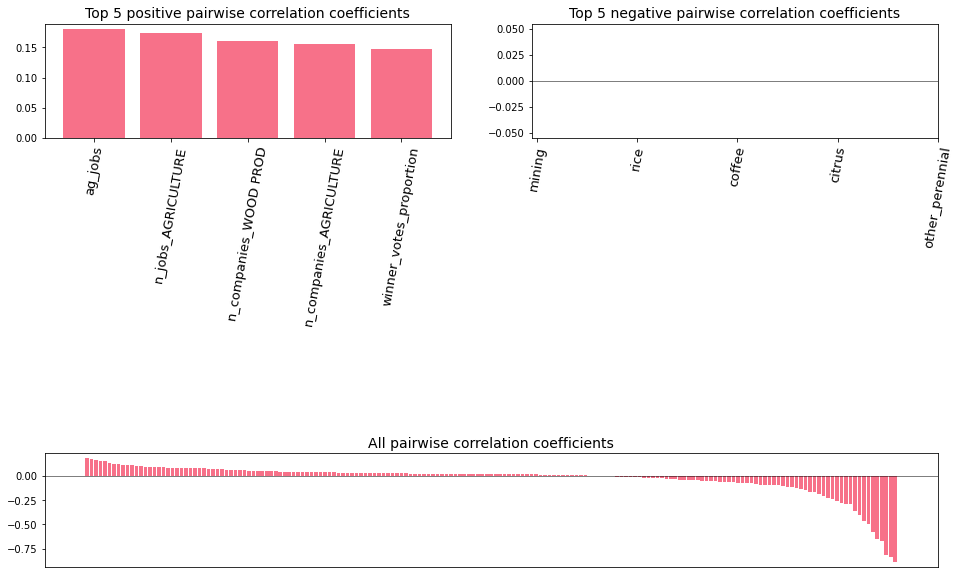

GridSpec(2, 2)

In [101]:
corr_X_y(X_train, Y_train, figsize=(16, 10), label_rotation=80, hspace=1, fontsize=14)